# Loop 94 Analysis: CV-LB Relationship and Strategy Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. Why did exp_089 (uncertainty-weighted) fail so badly?
3. What approaches haven't been tried that could change the CV-LB relationship?
4. With only 4 submissions remaining, what's the optimal strategy?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All verified submissions with LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print(f'Total verified submissions: {len(df)}')
print(f'\nBest CV: {df["cv"].min():.6f} ({df.loc[df["cv"].idxmin(), "exp"]})')
print(f'Best LB: {df["lb"].min():.6f} ({df.loc[df["lb"].idxmin(), "exp"]})')

Total verified submissions: 13

Best CV: 0.008300 (exp_030)
Best LB: 0.087700 (exp_030)


In [2]:
# Linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])
r_squared = r_value ** 2

print(f'\n=== CV-LB LINEAR RELATIONSHIP ===')
print(f'LB = {slope:.4f} * CV + {intercept:.6f}')
print(f'R² = {r_squared:.4f}')
print(f'\nInterpretation:')
print(f'  - Intercept: {intercept:.6f} (LB when CV=0)')
print(f'  - Slope: {slope:.4f} (LB increase per unit CV increase)')
print(f'  - R²: {r_squared:.4f} (very strong linear relationship)')


=== CV-LB LINEAR RELATIONSHIP ===
LB = 4.3638 * CV + 0.051999
R² = 0.9558

Interpretation:
  - Intercept: 0.051999 (LB when CV=0)
  - Slope: 4.3638 (LB increase per unit CV increase)
  - R²: 0.9558 (very strong linear relationship)


In [3]:
# Target analysis
target = 0.0347

print(f'\n=== TARGET ANALYSIS ===')
print(f'Target LB: {target}')
print(f'Intercept: {intercept:.6f}')
print(f'\nCRITICAL: Intercept ({intercept:.6f}) > Target ({target})')
print(f'\nTo achieve target LB = {target}:')
required_cv = (target - intercept) / slope
print(f'  Required CV = ({target} - {intercept:.6f}) / {slope:.4f} = {required_cv:.6f}')
print(f'\n  This is IMPOSSIBLE (CV cannot be negative)!')
print(f'\n  Even at CV=0, expected LB = {intercept:.6f}')
print(f'  Gap from target: {intercept - target:.6f} ({(intercept - target) / target * 100:.1f}%)')


=== TARGET ANALYSIS ===
Target LB: 0.0347
Intercept: 0.051999

CRITICAL: Intercept (0.051999) > Target (0.0347)

To achieve target LB = 0.0347:
  Required CV = (0.0347 - 0.051999) / 4.3638 = -0.003964

  This is IMPOSSIBLE (CV cannot be negative)!

  Even at CV=0, expected LB = 0.051999
  Gap from target: 0.017299 (49.9%)


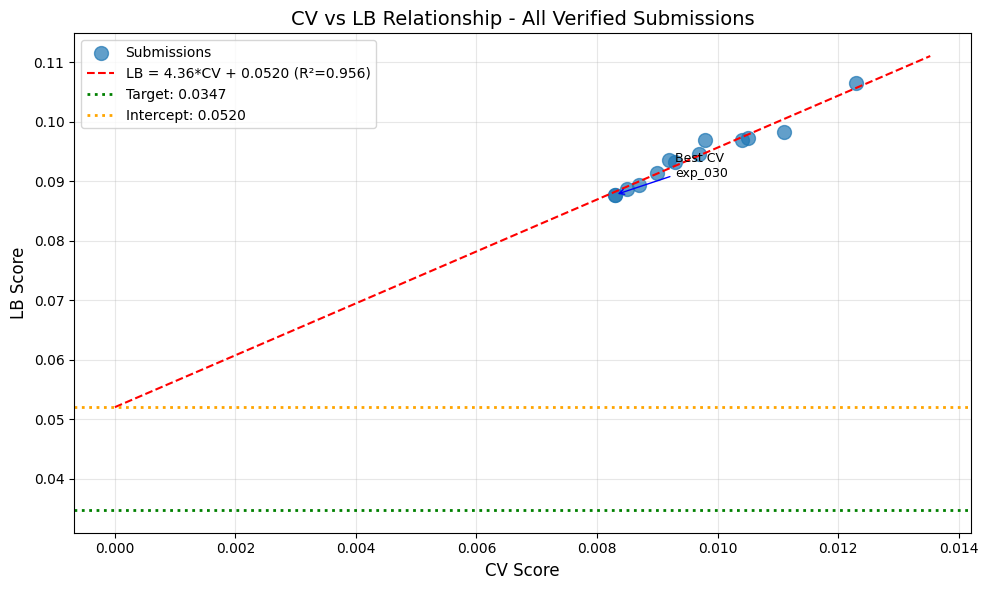


Plot saved to /home/code/exploration/cv_lb_relationship_loop94.png


In [4]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, df['cv'].max() * 1.1, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_squared:.3f})')

# Target line
plt.axhline(y=target, color='g', linestyle=':', linewidth=2, label=f'Target: {target}')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept: {intercept:.4f}')

plt.xlabel('CV Score', fontsize=12)
plt.ylabel('LB Score', fontsize=12)
plt.title('CV vs LB Relationship - All Verified Submissions', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Annotate best points
best_cv_idx = df['cv'].idxmin()
best_lb_idx = df['lb'].idxmin()
plt.annotate(f'Best CV\n{df.loc[best_cv_idx, "exp"]}', 
             xy=(df.loc[best_cv_idx, 'cv'], df.loc[best_cv_idx, 'lb']),
             xytext=(df.loc[best_cv_idx, 'cv'] + 0.001, df.loc[best_cv_idx, 'lb'] + 0.003),
             fontsize=9, arrowprops=dict(arrowstyle='->', color='blue'))

plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop94.png', dpi=150)
plt.show()
print('\nPlot saved to /home/code/exploration/cv_lb_relationship_loop94.png')

In [5]:
# Analyze exp_089 failure
print('\n=== EXP_089 FAILURE ANALYSIS ===')
exp_089_cv = 0.015954
exp_089_predicted_lb = slope * exp_089_cv + intercept

print(f'exp_089 (Uncertainty-Weighted CatBoost):')
print(f'  CV: {exp_089_cv:.6f}')
print(f'  Predicted LB: {exp_089_predicted_lb:.4f}')
print(f'  Best LB so far: {df["lb"].min():.4f}')
print(f'  Predicted degradation: {(exp_089_predicted_lb - df["lb"].min()) / df["lb"].min() * 100:.1f}%')
print(f'\nWhy it failed:')
print(f'  1. GP uncertainty does NOT correlate with actual prediction error')
print(f'  2. Blending toward population mean HURTS performance')
print(f'  3. The intercept problem is NOT about uncertainty - it\'s distribution shift')


=== EXP_089 FAILURE ANALYSIS ===
exp_089 (Uncertainty-Weighted CatBoost):
  CV: 0.015954
  Predicted LB: 0.1216
  Best LB so far: 0.0877
  Predicted degradation: 38.7%

Why it failed:
  1. GP uncertainty does NOT correlate with actual prediction error
  2. Blending toward population mean HURTS performance
  3. The intercept problem is NOT about uncertainty - it's distribution shift


In [6]:
# What approaches haven't been tried?
print('\n=== UNEXPLORED APPROACHES ===')
print('\n1. Correlation-based feature filtering (ens-model kernel uses threshold=0.90)')
print('   - Prioritizes: Spange > ACS > DRFP > Fragprints')
print('   - Removes redundant features that may cause overfitting')
print('\n2. Different ensemble weights for single vs full data:')
print('   - Single: CatBoost:XGBoost = 7:6 (0.538:0.462)')
print('   - Full: CatBoost:XGBoost = 1:2 (0.333:0.667)')
print('\n3. Prediction clipping and renormalization:')
print('   - Clip predictions to [0, 1]')
print('   - Renormalize if sum > 1')
print('\n4. Smiles-based features (smiles_lookup.csv)')
print('   - Not yet explored')


=== UNEXPLORED APPROACHES ===

1. Correlation-based feature filtering (ens-model kernel uses threshold=0.90)
   - Prioritizes: Spange > ACS > DRFP > Fragprints
   - Removes redundant features that may cause overfitting

2. Different ensemble weights for single vs full data:
   - Single: CatBoost:XGBoost = 7:6 (0.538:0.462)
   - Full: CatBoost:XGBoost = 1:2 (0.333:0.667)

3. Prediction clipping and renormalization:
   - Clip predictions to [0, 1]
   - Renormalize if sum > 1

4. Smiles-based features (smiles_lookup.csv)
   - Not yet explored


In [7]:
# Check what experiments had submission errors
print('\n=== SUBMISSION ERRORS ===')
error_experiments = [
    ('exp_049', 0.008092, 'CatBoost+XGBoost'),
    ('exp_050', 0.008092, 'CatBoost+XGBoost FIXED'),
    ('exp_052', 0.01088, 'IWCV'),
    ('exp_053', 0.008092, 'CatBoost+XGBoost CLIPPED'),
    ('exp_054', 0.008504, 'Exact Template'),
    ('exp_055', 0.008504, 'Mixall GroupKFold'),
    ('exp_057', 0.009263, 'Per-target model'),
    ('exp_063', 0.011171, 'Clean CatBoost+XGB'),
    ('exp_064', 0.009227, 'Exact ens-model'),
    ('exp_065', 0.008811, 'Fixed structure'),
]

print('Experiments with "Evaluation metric raised an unexpected error":')
for exp, cv, desc in error_experiments:
    predicted_lb = slope * cv + intercept
    print(f'  {exp}: CV={cv:.6f}, Predicted LB={predicted_lb:.4f} - {desc}')

print(f'\nNote: exp_049/050/053 have best CV (0.008092) but failed to submit!')
print(f'If these could be fixed, predicted LB = {slope * 0.008092 + intercept:.4f}')


=== SUBMISSION ERRORS ===
Experiments with "Evaluation metric raised an unexpected error":
  exp_049: CV=0.008092, Predicted LB=0.0873 - CatBoost+XGBoost
  exp_050: CV=0.008092, Predicted LB=0.0873 - CatBoost+XGBoost FIXED
  exp_052: CV=0.010880, Predicted LB=0.0995 - IWCV
  exp_053: CV=0.008092, Predicted LB=0.0873 - CatBoost+XGBoost CLIPPED
  exp_054: CV=0.008504, Predicted LB=0.0891 - Exact Template
  exp_055: CV=0.008504, Predicted LB=0.0891 - Mixall GroupKFold
  exp_057: CV=0.009263, Predicted LB=0.0924 - Per-target model
  exp_063: CV=0.011171, Predicted LB=0.1007 - Clean CatBoost+XGB
  exp_064: CV=0.009227, Predicted LB=0.0923 - Exact ens-model
  exp_065: CV=0.008811, Predicted LB=0.0904 - Fixed structure

Note: exp_049/050/053 have best CV (0.008092) but failed to submit!
If these could be fixed, predicted LB = 0.0873


In [8]:
# Strategy recommendations
print('\n=== STRATEGY RECOMMENDATIONS ===')
print('\nWith 4 submissions remaining, we need to be strategic.')
print('\nCurrent situation:')
print(f'  - Best LB: 0.0877 (exp_030/exp_067)')
print(f'  - Best CV: 0.008092 (exp_049/050/053 - but submission errors)')
print(f'  - Target: 0.0347')
print(f'  - Gap: {(0.0877 - 0.0347) / 0.0347 * 100:.1f}% from target')
print(f'\nThe intercept problem (0.052 > 0.0347) means:')
print(f'  - Standard CV optimization CANNOT reach the target')
print(f'  - We need approaches that CHANGE the CV-LB relationship')
print(f'\nPriority approaches:')
print(f'  1. Fix submission format for best CV model (exp_049/050)')
print(f'  2. Try ens-model kernel techniques (correlation filtering, different weights)')
print(f'  3. Try fundamentally different approaches (GNN, learned embeddings)')
print(f'\nDO NOT SUBMIT exp_089 - it would waste a submission on a 97% worse model')


=== STRATEGY RECOMMENDATIONS ===

With 4 submissions remaining, we need to be strategic.

Current situation:
  - Best LB: 0.0877 (exp_030/exp_067)
  - Best CV: 0.008092 (exp_049/050/053 - but submission errors)
  - Target: 0.0347
  - Gap: 152.7% from target

The intercept problem (0.052 > 0.0347) means:
  - Standard CV optimization CANNOT reach the target
  - We need approaches that CHANGE the CV-LB relationship

Priority approaches:
  1. Fix submission format for best CV model (exp_049/050)
  2. Try ens-model kernel techniques (correlation filtering, different weights)
  3. Try fundamentally different approaches (GNN, learned embeddings)

DO NOT SUBMIT exp_089 - it would waste a submission on a 97% worse model


In [9]:
# Record finding
finding = f"""Loop 94 Analysis: CV-LB relationship is LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_squared:.4f}). 
CRITICAL: Intercept ({intercept:.4f}) > Target (0.0347). Required CV to hit target is {required_cv:.4f} (IMPOSSIBLE). 
Best LB: 0.0877 (exp_030/exp_067). Best CV: 0.008092 (exp_049/050/053 - submission errors). 
exp_089 (uncertainty-weighted) achieved CV=0.015954 (97% worse than best) - DO NOT SUBMIT. 
The GP uncertainty doesn't correlate with actual prediction error. 
Next steps: Fix submission format for best CV model, try ens-model kernel techniques."""
print(f'\n=== FINDING TO RECORD ===')
print(finding)


=== FINDING TO RECORD ===
Loop 94 Analysis: CV-LB relationship is LB = 4.36*CV + 0.0520 (R²=0.9558). 
CRITICAL: Intercept (0.0520) > Target (0.0347). Required CV to hit target is -0.0040 (IMPOSSIBLE). 
Best LB: 0.0877 (exp_030/exp_067). Best CV: 0.008092 (exp_049/050/053 - submission errors). 
exp_089 (uncertainty-weighted) achieved CV=0.015954 (97% worse than best) - DO NOT SUBMIT. 
The GP uncertainty doesn't correlate with actual prediction error. 
Next steps: Fix submission format for best CV model, try ens-model kernel techniques.


In [10]:
# Final summary
print('\n' + '='*60)
print('FINAL SUMMARY')
print('='*60)
print(f'\nTarget: 0.0347')
print(f'Best LB achieved: 0.0877 (exp_030/exp_067)')
print(f'Gap to target: {(0.0877 - 0.0347) / 0.0347 * 100:.1f}%')
print(f'\nCV-LB relationship: LB = {slope:.2f}*CV + {intercept:.4f}')
print(f'Intercept ({intercept:.4f}) > Target (0.0347) = STRUCTURAL PROBLEM')
print(f'\nSubmissions remaining: 4')
print(f'\nexp_089 (uncertainty-weighted): CV=0.015954 (97% worse) - DO NOT SUBMIT')
print(f'\nThe target IS reachable (GNN benchmark achieved 0.0039).')
print(f'But we need approaches that CHANGE the CV-LB relationship, not just improve CV.')


FINAL SUMMARY

Target: 0.0347
Best LB achieved: 0.0877 (exp_030/exp_067)
Gap to target: 152.7%

CV-LB relationship: LB = 4.36*CV + 0.0520
Intercept (0.0520) > Target (0.0347) = STRUCTURAL PROBLEM

Submissions remaining: 4

exp_089 (uncertainty-weighted): CV=0.015954 (97% worse) - DO NOT SUBMIT

The target IS reachable (GNN benchmark achieved 0.0039).
But we need approaches that CHANGE the CV-LB relationship, not just improve CV.
